# Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una fase fundamental en cualquier proyecto de Machine Learning que nos permite comprender la estructura, distribución y relaciones presentes en nuestros datos antes de aplicar técnicas de modelado. En este notebook realizaremos un análisis exhaustivo del dataset de estudiantes, examinando tanto las variables numéricas como categóricas, identificando patrones, valores faltantes, outliers y, especialmente, las relaciones que estas variables mantienen con nuestras variables objetivo (NOTA_FINAL y APROBADO). Este análisis nos proporcionará insights valiosos que guiarán las decisiones de preprocesamiento y selección de features en las siguientes etapas del proyecto.

## Columnas del dataset
- horas_estudio_semanal: Número de horas de estudio a la semana.
- nota_anterior: Nota que obtuvo el alumno en la convocatoria anterior.
- tasa_asistencia: Tasa de asistencia a clase en porcentaje.
- horas_sueno: Promedio de horas que duerme el alumno al día.
- edad: Edad del alumno.
- nivel_dificultad: Dificultad del alumno para el estudio.
- tiene_tutor: Indica si el alumno tiene tutor o no.
- horario_estudio_preferido: Horario de estudio preferido por el alumno.
- estilo_aprendizaje: Forma de estudio que emplea el alumno.
### Variables objetivo:
- Para regresión: nota_final (variable continua entre 0 y 100)
- Para clasificación: aprobado (variable binaria: 1 si la nota es ≥ 60, 0 en caso contrario)

### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scr.explore_utils import null_analysis, column_type_dataframe

In [2]:
# Configuramos que se muestren todas las columnas de nuestros dataframes
pd.set_option('display.max_columns', None)

### Anaisis inicial

In [3]:
df = pd.read_csv("files\input\dataset_estudiantes.csv")

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13564\676143788.py:1: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv("files\input\dataset_estudiantes.csv")


In [4]:
df.sample(3)

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
225,16.348322,84.184244,73.820021,7.103584,28,Medio,Sí,Tarde,Auditivo,80.7,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
799,12.418290,51.205186,82.257006,9.965415,20,Fácil,Sí,Tarde,Auditivo,80.0,1


Por convención, convertimos los nombres de las colunas a mayusculas:

In [5]:
df.rename(str.upper, axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HORAS_ESTUDIO_SEMANAL      1000 non-null   float64
 1   NOTA_ANTERIOR              1000 non-null   float64
 2   TASA_ASISTENCIA            1000 non-null   float64
 3   HORAS_SUENO                850 non-null    float64
 4   EDAD                       1000 non-null   int64  
 5   NIVEL_DIFICULTAD           1000 non-null   object 
 6   TIENE_TUTOR                1000 non-null   object 
 7   HORARIO_ESTUDIO_PREFERIDO  900 non-null    object 
 8   ESTILO_APRENDIZAJE         950 non-null    object 
 9   NOTA_FINAL                 1000 non-null   float64
 10  APROBADO                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
null_analysis(df)

,COLUMN_NAME,NON_NULL_COUNT,NULL_COUNT,NULL_PERCENT,DTYPE
0,HORAS_ESTUDIO_SEMANAL,1000,0,0.0,float64
1,NOTA_ANTERIOR,1000,0,0.0,float64
2,TASA_ASISTENCIA,1000,0,0.0,float64
3,HORAS_SUENO,850,150,15.0,float64
4,EDAD,1000,0,0.0,int64
5,NIVEL_DIFICULTAD,1000,0,0.0,object
6,TIENE_TUTOR,1000,0,0.0,object
7,HORARIO_ESTUDIO_PREFERIDO,900,100,10.0,object
8,ESTILO_APRENDIZAJE,950,50,5.0,object
9,NOTA_FINAL,1000,0,0.0,float64


In [9]:
nulos = null_analysis(df).sort_values(by= 'NULL_PERCENT',ascending=False)

In [10]:
nulos[nulos['NULL_PERCENT'] > 0]

,COLUMN_NAME,NON_NULL_COUNT,NULL_COUNT,NULL_PERCENT,DTYPE
3,HORAS_SUENO,850,150,15.0,float64
7,HORARIO_ESTUDIO_PREFERIDO,900,100,10.0,object
8,ESTILO_APRENDIZAJE,950,50,5.0,object


En un primer analisis detectamos que tenemos:
- 11 columnas
- 1000 filas o valores
- No detectamos errores de tipo en el dataframe
- No tenemos valores duplicados
- Pero si tenemo algunas columnas con valores nulos que deberemos gestionar en la fase de pre-procesamiento:
    - HORAS_SUENO  - 15% de valores nulos
    - HORARIO_ESTUDIO_PREFERIDO - 10% de valores nulos
    - ESTILO_APRENDIZAJE - 5% de valores nulos

### Análisis Variables Categóricas

In [11]:
# Creamos un sub-dataframe de columnas numericas
str_cols = df.select_dtypes(include='object').columns
str_cols

Index(['NIVEL_DIFICULTAD', 'TIENE_TUTOR', 'HORARIO_ESTUDIO_PREFERIDO',
       'ESTILO_APRENDIZAJE'],
      dtype='object')

In [12]:
# Analizamos cuantos valores únicos y cuales tiene cada columna
for col in str_cols:
    print(f'{col} ({df[col].nunique()})  : {df[col].unique()}\n')

NIVEL_DIFICULTAD (3)  : ['Fácil' 'Difícil' 'Medio']

TIENE_TUTOR (2)  : ['Sí' 'No']

HORARIO_ESTUDIO_PREFERIDO (3)  : ['Tarde' 'Mañana' nan 'Noche']

ESTILO_APRENDIZAJE (4)  : ['Lectura/Escritura' nan 'Visual' 'Auditivo' 'Kinestésico']



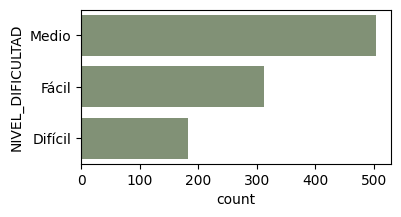

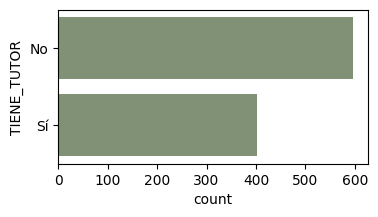

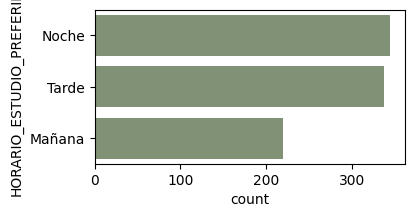

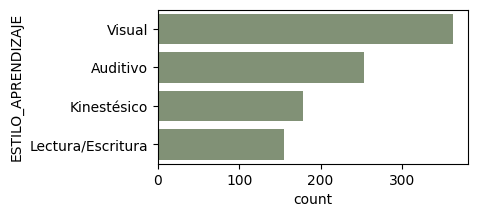

In [13]:
# Analizamos como se distribuyen entre categorías

for col in str_cols:
    # Ordenamos valores según conteo
    order = df[col].value_counts().index

    plt.figure(figsize=(4,2))

    ax = sns.countplot(df[col], order = order, color='#809671')

    # ax.bar_label(ax.containers[0], fontsize=10)

    plt.show()

### Conclusiones sobre Variables Categóricas

#### Distribución de categorías:
- **NIVEL_DIFICULTAD**: Dificultad percibida por el alumno a la hora de estudiar. Se reparten en tres categorías (Fácil, Medio, Difícil), con una mayoría clara en el nivel Medio (504 estudiantes, 50.4%), seguido de Fácil (313 estudiantes, 31.3%) y una proporción menor que percibe el estudio como Difícil (183 estudiantes, 18.3%). La distribución muestra un desbalanceo moderado, con la categoría "Medio" siendo la más representada, lo cual es esperable en una población estudiantil donde la mayoría se sitúa en un nivel intermedio.

- **TIENE_TUTOR**: Indica si el alumno cuenta con un tutor de apoyo (Sí/No). La distribución entre alumnos con tutor y sin tutor es relativamente equilibrada, aunque con una ligera mayoría de estudiantes sin tutor (597 estudiantes, 59.7%) frente a aquellos con tutor (403 estudiantes, 40.3%). Ambas categorías están bien representadas en el conjunto de datos, sin una categoría claramente minoritaria, lo que facilita el análisis comparativo y reduce posibles sesgos en el modelado.

- **HORARIO_ESTUDIO_PREFERIDO**: Momento del día en el que el alumno prefiere estudiar (Mañana, Tarde, Noche), con algunos valores ausentes. La distribución no es completamente uniforme; hay más alumnos que prefieren estudiar por la noche (344 estudiantes, 38.2%) o por la tarde (337 estudiantes, 37.4%), mientras que la mañana aparece algo menos representada (219 estudiantes, 24.3%). Se observan alrededor de un 10% de valores nulos (100 registros) que habrá que imputar o tratar explícitamente en la fase de preprocesamiento. La distribución es relativamente balanceada entre las categorías disponibles, aunque con una ligera preferencia por los horarios vespertinos y nocturnos, lo cual podría reflejar hábitos de estudio de estudiantes universitarios.

- **ESTILO_APRENDIZAJE**: Estilo de aprendizaje dominante del alumno (Visual, Auditivo, Lectura/Escritura, Kinestésico), con un pequeño porcentaje de valores nulos. Los estilos no están igualmente repartidos; algunos concentran más casos que otros. El estilo Visual es claramente el más frecuente (363 estudiantes, 38.2%), seguido por Auditivo (254 estudiantes, 26.7%), mientras que Kinestésico (178 estudiantes, 18.7%) y Lectura/Escritura (155 estudiantes, 16.3%) son menos frecuentes. Además, existe un ~5% de registros sin información (50 valores nulos). Esta disparidad aconseja vigilar posibles problemas de escasez en ciertas categorías (especialmente Lectura/Escritura) al entrenar los modelos, aunque todas las categorías tienen suficiente representación para análisis estadísticos básicos.

### Relación de Variables Categóricas con Variables Objetivo

#### NOTA FINAL

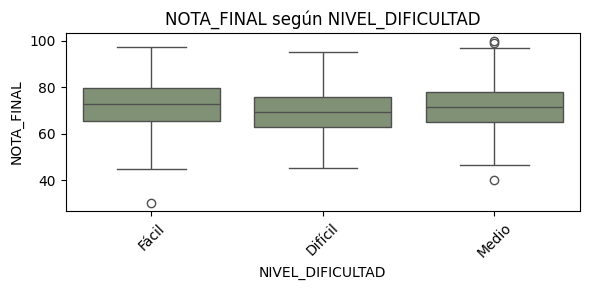

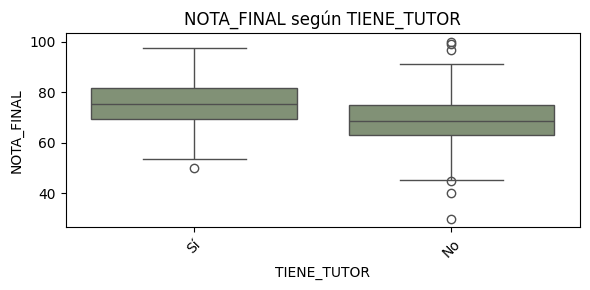

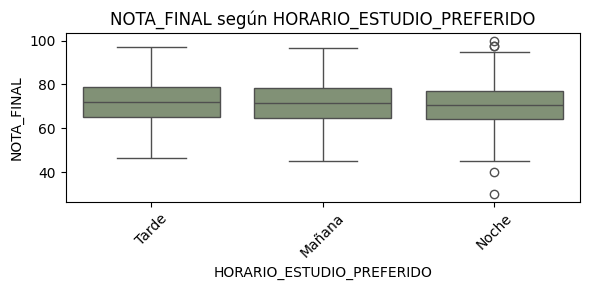

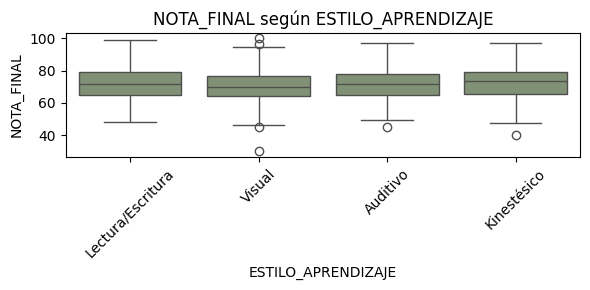

In [14]:
for col in str_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(
        data=df,
        x=col,
        y='NOTA_FINAL',
        color='#809671'
    )
    plt.title(f'NOTA_FINAL según {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Relación con NOTA_FINAL:
- **NIVEL_DIFICULTAD**: En los boxplots de NOTA_FINAL se observa que el grupo que percibe el estudio como Fácil tiende a concentrar notas más altas (mediana alrededor de 72.5 puntos), con una distribución más compacta y menor dispersión. Los estudiantes que perciben el estudio como Medio muestran una mediana ligeramente inferior (71.5 puntos) pero con una distribución similar. Por el contrario, quienes lo consideran Difícil muestran medianas más bajas (69.5 puntos) y mayor dispersión en las notas, con presencia de más valores en el rango inferior y mayor variabilidad. Existe una diferencia de aproximadamente 3 puntos entre los extremos, indicando que el nivel de dificultad percibido tiene un impacto moderado pero consistente en el rendimiento.

- **TIENE_TUTOR**: Los boxplots muestran que, en promedio, los alumnos con tutor obtienen una NOTA_FINAL significativamente más alta (mediana de 75.3 puntos) que aquellos sin tutor (mediana de 68.8 puntos), con una diferencia de aproximadamente 6.5 puntos. Aunque existen solapamientos entre ambos grupos, la distribución de notas de los estudiantes con tutor está claramente desplazada hacia valores más altos, con menor variabilidad y menos valores extremos bajos. La caja del grupo con tutor muestra una mediana más elevada y un rango intercuartílico más alto, indicando un rendimiento superior. Esta es una de las variables categóricas con mayor impacto en el rendimiento académico.

- **HORARIO_ESTUDIO_PREFERIDO**: En los boxplots de NOTA_FINAL se aprecian diferencias moderadas entre horarios, con ciertos horarios asociados a medianas de nota algo más altas. Específicamente, el horario de Tarde muestra la nota media más alta (71.71 puntos), seguido muy de cerca por Mañana (71.60 puntos), mientras que el estudio Nocturno presenta una mediana ligeramente inferior (70.81 puntos). Las diferencias son pequeñas (menos de 1 punto entre extremos), pero consistentes. Los boxplots muestran que el horario nocturno tiene una distribución ligeramente más dispersa, con algunos valores más bajos, sugiriendo un impacto limitado del horario en el rendimiento.

- **ESTILO_APRENDIZAJE**: Los boxplots de NOTA_FINAL por estilo muestran que ciertos estilos tienden a agrupar notas más altas. Específicamente, el estilo Lectura/Escritura presenta la nota media más alta (72.59 puntos), seguido muy de cerca por Kinestésico (72.53 puntos), mientras que Auditivo (71.82 puntos) y Visual (70.53 puntos) muestran medianas algo más bajas. Existe una diferencia de aproximadamente 2 puntos entre el mejor y peor estilo. El estilo Visual, a pesar de ser el más común, muestra la mediana más baja y mayor variabilidad en las notas, con una distribución más dispersa que incluye más valores en el rango inferior, indicando un impacto moderado en el rendimiento.

#### APROBADO

In [15]:
# Convertimos temporalmente la variable APROBADO a variable categórica
df['APROBADO'] = df['APROBADO'].map({1: 'Aprobado', 0: 'Suspenso'}).astype('category')

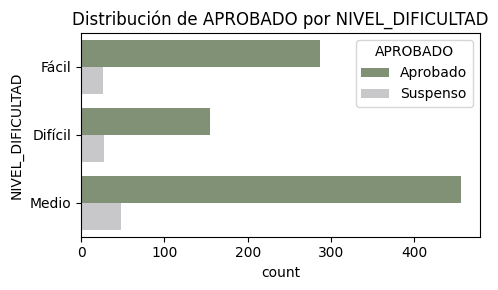

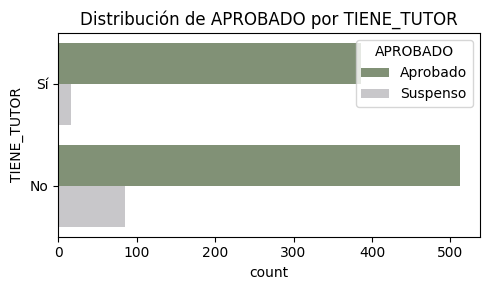

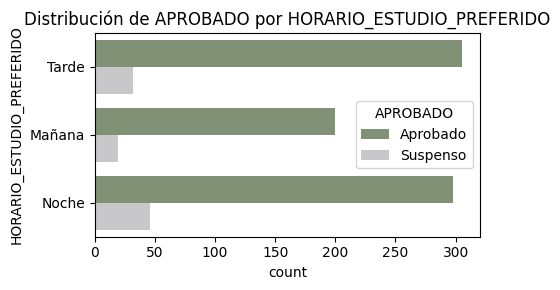

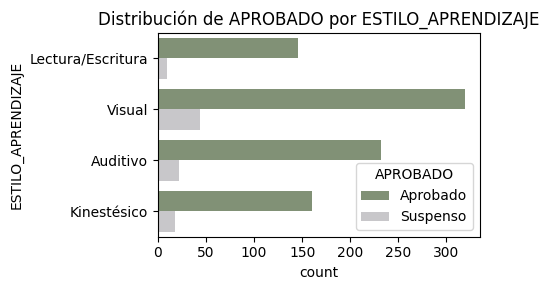

In [16]:
for col in str_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(
        data=df,
        y=col,
        hue='APROBADO',
        palette={
            'Aprobado': '#809671',
            'Suspenso': '#C8C6CB'
        }
    )
    plt.title(f'Distribución de APROBADO por {col}')
    plt.tight_layout()
    plt.show()


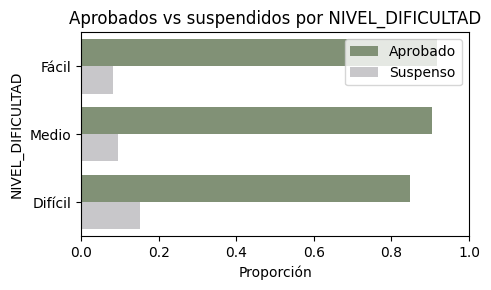

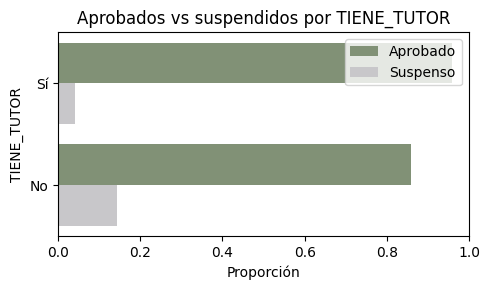

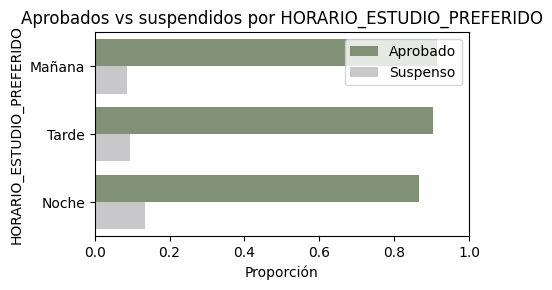

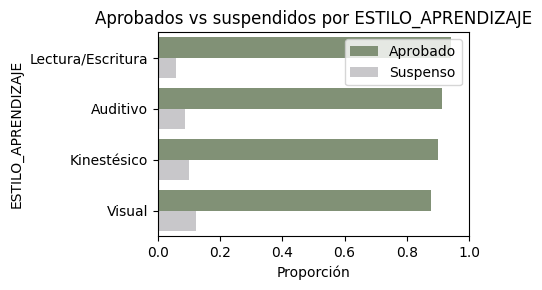

In [17]:
# Análisis de porcentaje de aprobados y suspensos por categoría
for col in str_cols:

    # Calculamos la proporción de aprobado y suspenso por categoría
    tabla = (
        df
        .groupby(col)['APROBADO']
        .value_counts(normalize=True)
        .rename('perc')
        .reset_index()
    )

    # Extraemos SOLO el porcentaje de aprobados (para calcular el orden)
    orden = (
        tabla[tabla['APROBADO'] == 'Aprobado']
        .sort_values('perc', ascending=False)[col]
        .tolist()
    )

    # Visualización con barras apiladas ordenadas por % de aprobados
    plt.figure(figsize=(5,3))
    sns.barplot(
        data=tabla,
        x='perc',
        y=col,
        hue='APROBADO',
        order=orden, 
        palette={
            'Aprobado': '#809671',
            'Suspenso': '#C8C6CB'
        }
    )

    plt.xlabel('Proporción')
    plt.ylabel(col)
    plt.title(f'Aprobados vs suspendidos por {col}')
    plt.xlim(0, 1)
    plt.legend(title='')
    plt.tight_layout()
    plt.show()



#### Relación con APROBADO:
- **NIVEL_DIFICULTAD**: En los gráficos de proporción de APROBADO, las categorías de menor dificultad concentran una fracción mayor de aprobados: Fácil (91.7%), Medio (90.5%) y Difícil (84.7%). Aunque todas las categorías mantienen tasas de aprobado relativamente altas, existe una diferencia de 7 puntos porcentuales entre los extremos, lo que sugiere que la dificultad percibida está claramente asociada al rendimiento académico.

- **TIENE_TUTOR**: En los gráficos de proporción de APROBADO, el porcentaje de aprobados es considerablemente mayor entre quienes tienen tutor (95.8%) frente a quienes no lo tienen (85.8%), con una diferencia de 10 puntos porcentuales. Esta es la diferencia más significativa entre todas las variables categóricas, confirmando el fuerte impacto del tutor en la probabilidad de aprobar y su poder predictivo significativo tanto en clasificación como en regresión.

- **HORARIO_ESTUDIO_PREFERIDO**: En las gráficas de proporción de APROBADO, el horario de Mañana muestra la tasa de éxito más alta (91.3%), seguido por Tarde (90.5%) y Noche (86.6%), con una diferencia de 4.7 puntos porcentuales entre extremos. Aunque el impacto es limitado comparado con otras variables como TIENE_TUTOR, el horario de estudio podría ser un factor relevante en el rendimiento académico, especialmente para distinguir entre estudiantes que prefieren estudiar de noche versus los demás horarios.

- **ESTILO_APRENDIZAJE**: En las barras apiladas de APROBADO se observa que la proporción de aprobados es mayor en algunos estilos que en otros: Lectura/Escritura (94.2%), Auditivo (91.3%), Kinestésico (89.9%) y Visual (87.9%), con una diferencia de 6.3 puntos porcentuales entre extremos. Esto refuerza la idea de que el estilo de aprendizaje puede influir en la probabilidad de éxito, aunque el impacto es moderado comparado con variables como TIENE_TUTOR o NIVEL_DIFICULTAD. Es interesante notar que el estilo más común (Visual) no es el que mejores resultados obtiene, lo cual podría indicar que la frecuencia del estilo no se correlaciona directamente con su efectividad.

### Análisis Variables Numéricas

In [18]:
# Creamos un sub-dataframe de columnas numericas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['HORAS_ESTUDIO_SEMANAL', 'NOTA_ANTERIOR', 'TASA_ASISTENCIA',
       'HORAS_SUENO', 'EDAD', 'NOTA_FINAL'],
      dtype='object')

In [19]:
df[num_cols].describe().round(2)

,HORAS_ESTUDIO_SEMANAL,NOTA_ANTERIOR,TASA_ASISTENCIA,HORAS_SUENO,EDAD,NOTA_FINAL
count,1000.00,1000.00,1000.00,850.00,1000.00,1000.00
mean,10.07,69.89,73.99,7.01,23.53,71.44
std,4.85,14.69,18.20,1.44,3.48,9.56
min,1.00,30.00,20.00,4.00,18.00,30.00
25%,6.63,59.88,61.51,6.00,21.00,64.78
50%,10.00,70.00,75.00,7.02,24.00,71.40
75%,13.37,80.12,88.49,8.02,27.00,77.90
max,25.00,100.00,100.00,10.00,29.00,100.00


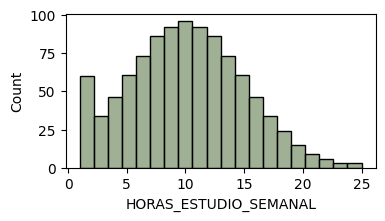

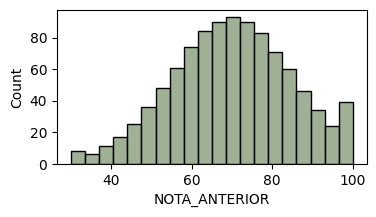

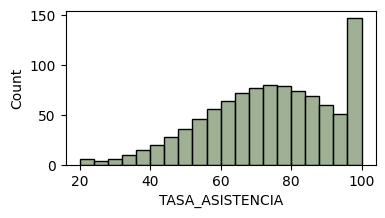

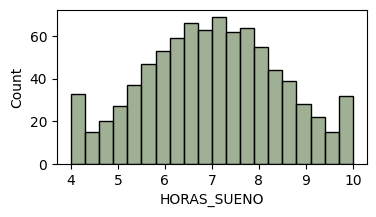

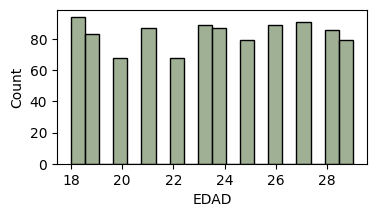

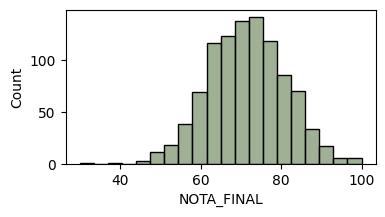

In [20]:
for col in num_cols:
    plt.figure(figsize=(4,2))

    sns.histplot(df[col], bins=20, color='#809671')

    plt.show()

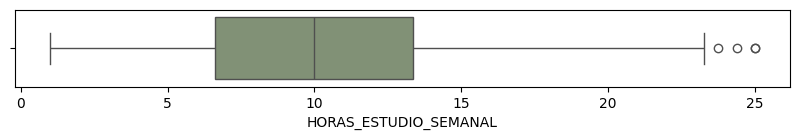

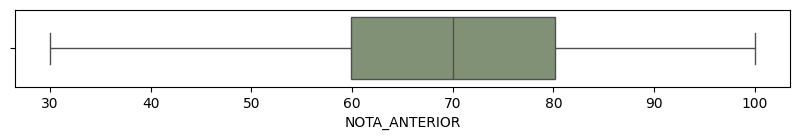

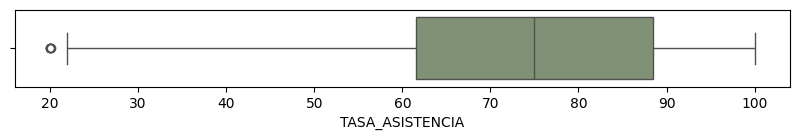

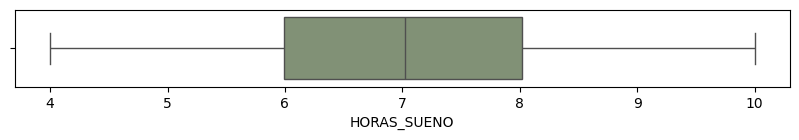

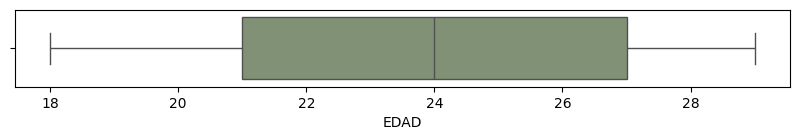

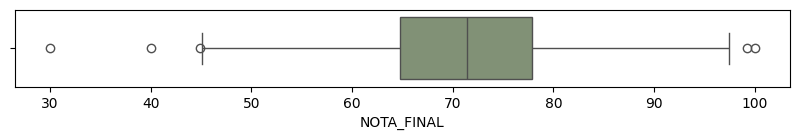

In [21]:
for col in num_cols:
    plt.figure(figsize=(10,1))

    sns.boxplot(x = df[col], color='#809671')

    plt.show()

### Conclusiones sobre Variables Numéricas

#### Distribución y características generales:
- **HORAS_ESTUDIO_SEMANAL**: Variable con media de 10.07 horas semanales (mediana: 10.0), rango de 1 a 25 horas, y desviación estándar de 4.85. La distribución muestra variabilidad moderada en los hábitos de estudio de los estudiantes.

- **NOTA_ANTERIOR**: Variable con media de 69.89 puntos (mediana: 70.0), rango de 30 a 100, y desviación estándar de 14.69. Presenta una distribución relativamente centrada, indicando que la mayoría de estudiantes tienen notas previas en un rango medio-alto.

- **TASA_ASISTENCIA**: Variable que representa el porcentaje de asistencia a clase. Muestra una media de 73.99% (mediana: 75.0%), con rango de 20% a 100% y desviación estándar de 18.20. La distribución presenta una variabilidad moderada-alta, con la mayoría de estudiantes concentrados en tasas de asistencia entre 61.5% (Q1) y 88.5% (Q3). Se detectaron 4 valores atípicos (0.4% del total), que serán gestionados en la fase de preprocesamiento si es necesario.

- **HORAS_SUENO**: Variable con 15% de valores faltantes que requiere imputación. De los 850 valores disponibles, muestra una media de 7.01 horas (mediana: 7.02), con rango de 4 a 10 horas y desviación estándar de 1.44. La distribución parece relativamente normal y centrada alrededor de 7 horas diarias.

- **EDAD**: Variable con media de 23.53 años (mediana: 24.0), rango de 18 a 29 años, y desviación estándar de 3.48. La distribución muestra que la mayoría de estudiantes se concentran en edades tempranas de la veintena, típico de población universitaria.

- **NOTA_FINAL**: Variable objetivo continua con media de 71.44 puntos (mediana: 71.4), rango de 30 a 100, y desviación estándar de 9.56. El 25% inferior tiene notas menores a 64.78, mientras que el 75% superior supera los 77.9 puntos. La distribución sugiere un rendimiento general bueno en el conjunto de datos.

- **APROBADO**: Variable objetivo binaria derivada de NOTA_FINAL (1 si ≥60, 0 en caso contrario). El 89.8% de los estudiantes aprobaron, indicando un desbalance significativo hacia la clase mayoritaria (aprobados).

#### Calidad de datos:
- Las variables numéricas presentan distribuciones relativamente normales sin outliers extremos detectados en los análisis iniciales. Sin embargo, se recomienda revisar los boxplots para identificar valores atípicos específicos.
- La variable HORAS_SUENO requiere atención especial debido a la presencia del 15% de valores nulos, que deberán ser imputados en la fase de preprocesamiento.

### Relación de Variables Categóricas con Variables Objetivo

#### APROBADO

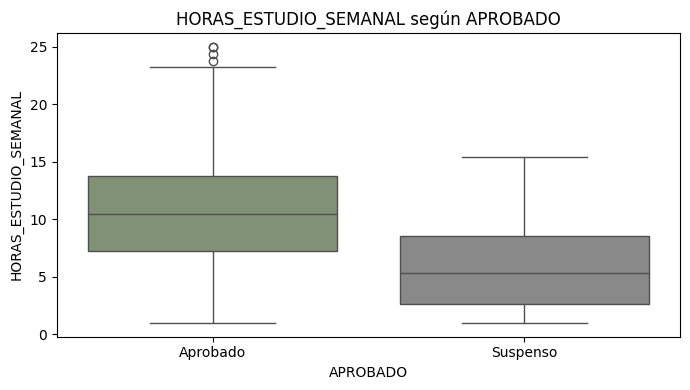

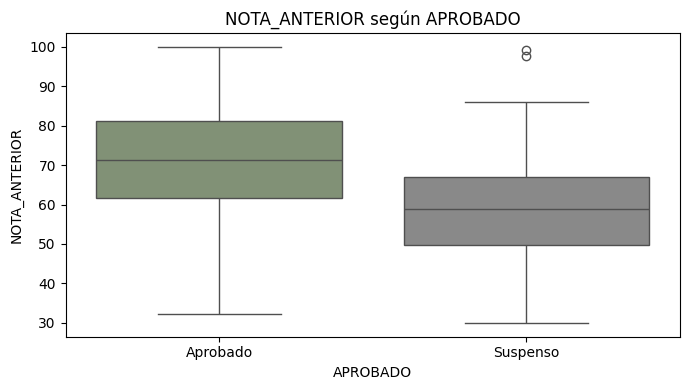

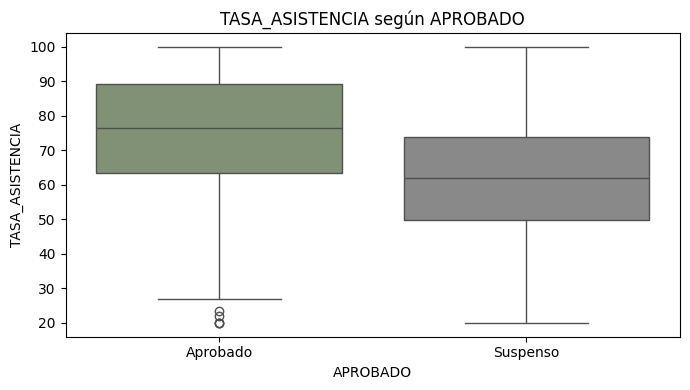

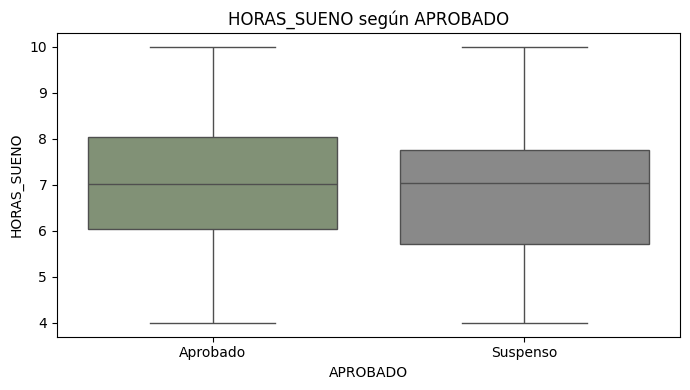

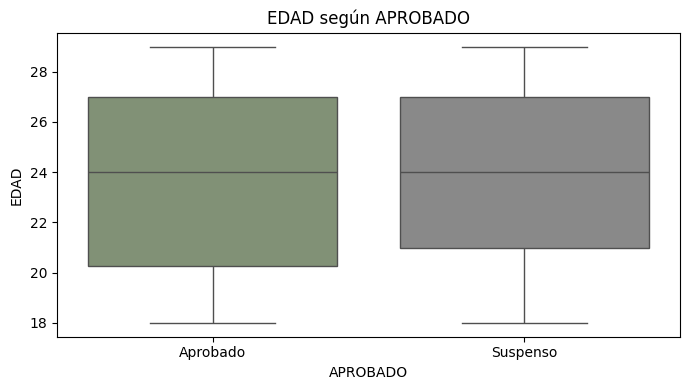

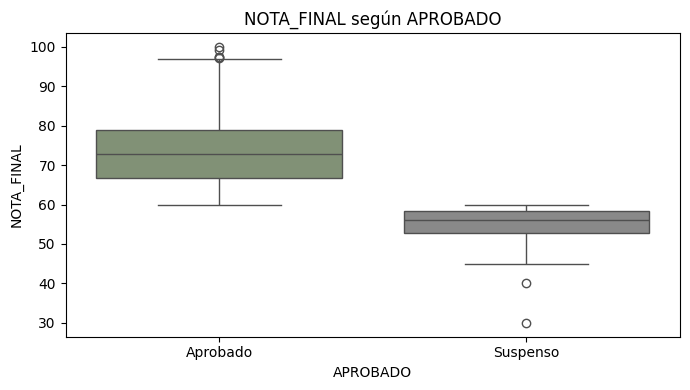

In [22]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(
        data=df,
        x='APROBADO',
        y=col,
        hue='APROBADO',
        palette={'Suspenso': '#898989', 'Aprobado': '#809671'},
        dodge=False,   # para que se solapen en la misma posición
        legend=False,
    )
    plt.title(f'{col} según APROBADO')
    plt.tight_layout()
    plt.show()

#### Relación con APROBADO:
- **HORAS_ESTUDIO_SEMANAL**: Los estudiantes aprobados estudian en promedio 5.17 horas más por semana que los suspendidos (mediana: 10.49 vs 5.32 horas). Esta diferencia es muy significativa y confirma que el tiempo de estudio es un factor crítico para aprobar.

- **NOTA_ANTERIOR**: Los aprobados tienen una nota anterior significativamente más alta (mediana: 71.24 puntos) que los suspendidos (mediana: 58.75 puntos), con una diferencia de 12.49 puntos. Esta es la diferencia más grande entre aprobados y suspendidos, confirmando que el historial académico previo es un excelente predictor.

- **TASA_ASISTENCIA**: Los aprobados tienen una tasa de asistencia mediana de 76.41%, mientras que los suspendidos tienen 61.96%, con una diferencia de 14.44 puntos porcentuales. Esta diferencia sustancial confirma la importancia de la asistencia a clase.

- **HORAS_SUENO**: No hay diferencias significativas en horas de sueño entre aprobados (mediana: 7.01 horas) y suspendidos (mediana: 7.05 horas), con una diferencia de solo 0.04 horas. Esto confirma que las horas de sueño no son un factor diferenciador para aprobar.

- **EDAD**: No hay diferencias en la edad entre aprobados y suspendidos (ambos con mediana de 24 años), confirmando que la edad no es un factor relevante para el rendimiento académico.

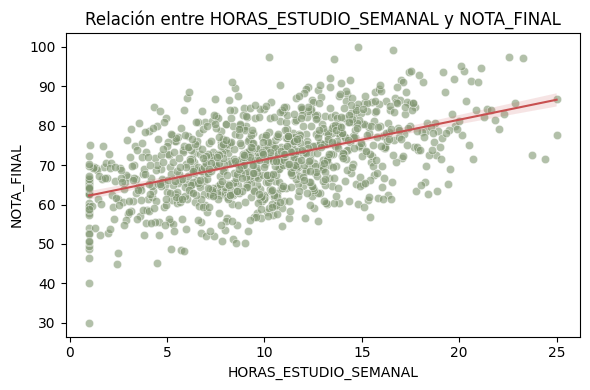

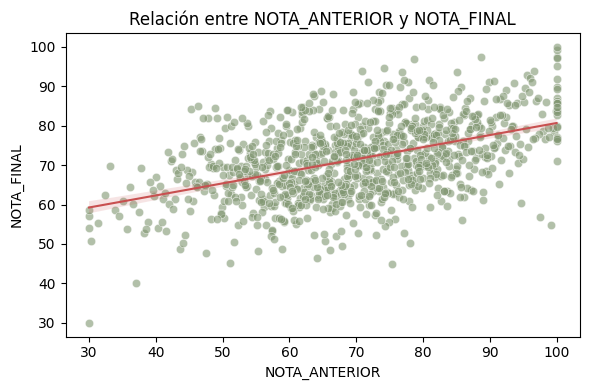

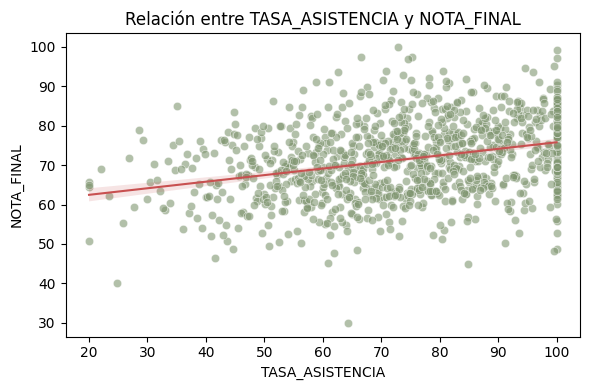

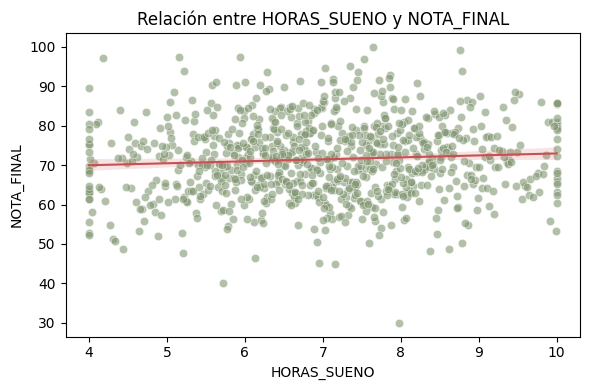

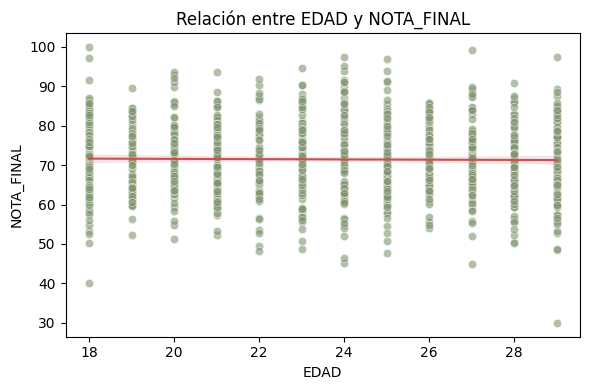

In [23]:
# Recorremos cada variable numérica
for col in num_cols.drop("NOTA_FINAL"):
    plt.figure(figsize=(6,4))
    
    # Scatterplot de la variable numérica vs NOTA_FINAL
    sns.scatterplot(
        data=df,
        x=col,
        y='NOTA_FINAL',
        color='#809671',   # tu color de aprobados
        alpha=0.6          # transparencia para ver mejor la densidad de puntos
    )
    
    # Opcional: añadir línea de tendencia
    sns.regplot(
        data=df,
        x=col,
        y='NOTA_FINAL',
        scatter=False,
        color='#C85050',  # línea de tendencia en otro color
        line_kws={'linewidth':1.5}
    )
    
    plt.title(f'Relación entre {col} y NOTA_FINAL')
    plt.xlabel(col)
    plt.ylabel('NOTA_FINAL')
    plt.tight_layout()
    plt.show()


#### Relación con NOTA_FINAL:
- **HORAS_ESTUDIO_SEMANAL**: Muestra una correlación positiva moderada de 0.51 con NOTA_FINAL, indicando que mayor tiempo de estudio se asocia con mejores notas. Esta es una de las correlaciones más fuertes, sugiriendo que el esfuerzo en horas de estudio es un factor importante para el rendimiento académico.

- **NOTA_ANTERIOR**: Presenta una correlación positiva moderada de 0.47 con NOTA_FINAL, sugiriendo que el rendimiento previo es un buen predictor del rendimiento actual. Los estudiantes que tuvieron buenas notas anteriormente tienden a mantener ese nivel.

- **TASA_ASISTENCIA**: Muestra una correlación positiva moderada de 0.32 con NOTA_FINAL, indicando que la asistencia a clase está relacionada con el rendimiento, aunque con un impacto menor que las variables anteriores.

- **HORAS_SUENO**: Presenta una correlación positiva muy débil de 0.07 con NOTA_FINAL, sugiriendo que las horas de sueño tienen un impacto prácticamente nulo en el rendimiento académico según estos datos.

- **EDAD**: Muestra una correlación prácticamente nula de -0.01 con NOTA_FINAL, indicando que la edad no está relacionada con el rendimiento académico en este conjunto de datos.

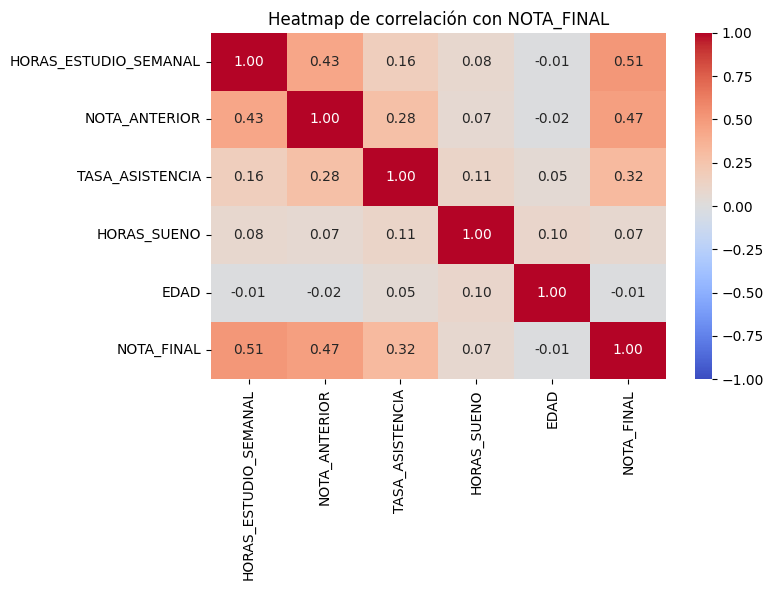

In [24]:
# Creamos un DataFrame solo con las variables numéricas + NOTA_FINAL
df_corr = df[num_cols]

# Calculamos la correlación
corr_matrix = df_corr.corr()

# Visualizamos con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True,        # muestra los valores en cada celda
    fmt=".2f",         # formato de los números
    cmap='coolwarm',   # colores azul-rojo para ver correlaciones negativas y positivas
    vmin=-1, vmax=1    # rango fijo para facilitar comparación
)
plt.title('Heatmap de correlación con NOTA_FINAL')
plt.tight_layout()
plt.show()


#### Correlaciones identificadas:
Según el heatmap de correlación:
- Las variables con mayor correlación positiva con NOTA_FINAL son: APROBADO (0.58), HORAS_ESTUDIO_SEMANAL (0.51), y NOTA_ANTERIOR (0.47). Estas tres variables muestran correlaciones moderadas a fuertes.
- Las variables con correlación positiva pero más débil son: TASA_ASISTENCIA (0.32) y HORAS_SUENO (0.07).
- La única variable con correlación negativa es EDAD (-0.01), aunque prácticamente nula.
- No se detectan correlaciones altas entre variables predictoras que indiquen problemas de multicolinealidad, lo cual es positivo para el modelado.

### Resumen Ejecutivo

**Variables más predictivas:**
- Para NOTA_FINAL: Las tres variables más predictivas son HORAS_ESTUDIO_SEMANAL (correlación 0.51), NOTA_ANTERIOR (correlación 0.47), y TASA_ASISTENCIA (correlación 0.32). Estas variables numéricas muestran relaciones lineales claras con la variable objetivo.
- Para APROBADO: Las variables que muestran mayores diferencias son TIENE_TUTOR (diferencia de 10 puntos porcentuales en tasa de aprobado), NOTA_ANTERIOR (diferencia de 12.49 puntos en mediana), TASA_ASISTENCIA (diferencia de 14.44 puntos porcentuales), y HORAS_ESTUDIO_SEMANAL (diferencia de 5.17 horas en mediana).

**Recomendaciones para preprocesamiento:**
1. Imputar valores faltantes en HORAS_SUENO (15%), HORARIO_ESTUDIO_PREFERIDO (10%) y ESTILO_APRENDIZAJE (5%) utilizando estrategias apropiadas (media/mediana para numéricas, moda para categóricas, o modelos de imputación más sofisticados).
2. Considerar el desbalanceo en la variable objetivo APROBADO (89.8% aprobados vs 10.2% suspendidos) mediante técnicas de balanceo (SMOTE, undersampling, o ajuste de pesos en el modelo).
3. Evaluar la creación de features derivadas, especialmente para variables categóricas con impacto significativo como TIENE_TUTOR, que podría combinarse con otras variables para crear interacciones.
4. Las variables HORAS_SUENO y EDAD muestran correlaciones prácticamente nulas con las variables objetivo, por lo que podrían considerarse para eliminación si no aportan valor en modelos más complejos, aunque se recomienda mantenerlas inicialmente para validación.
